# Métodos de estimación

Módulo 2 - Elementos de probabilidad y estadística

Facultad de Ciencias Exactas y Naturales y Agrimensura (FaCENA) - UNNE

Diplomatura Universitaria en Ciencia de Datos

Profesores:
* Lic. Álvarez Fernando fernando.alvarez@comunidad.unne.edu.ar
* Lic. Cabás Celine celine.cabas@comunidad.unne.edu.ar
* Dr. Hisgen Matías matias.hisgen@comunidad.unne.edu.ar

\

---

Cargamos las librerías a utilizar:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Para gráficos
import seaborn as sns           # Para gráficos
import scipy.stats as stats     # Para calcular funciones de densidad
import os

En contexto de estimaciones de la media poblacional, veremos dos métodos de estimación que son muy utilizados en el ajuste de modelos en ciencia de datos. Introduciremos estos conceptos, ilustrando con algunos ejemplos para entender cómo funcionan en la estimación de parámetros a partir de datos observados. Ambos nos permiten obtener estimaciones puntuales.

## Estimación por Mínimos Cuadrados Ordinarios (MCO)

Dada una muestra aleatoria de tamaño $n$ de la población $\{y_i: i=1,...,n \}$ podemos escribir cada observación de la muestra como
$$y_i=\mu_y+u_i$$

Nos interesa estimar el parámetro poblacional $\mu_y$ usando la muestra. si estimamos el parámetro, nos quedará un residuo estimado por observación. El residuo $\hat{u}_i$ es un estimador del término del error $u_i$ y es la diferencia entre la media estimada y la i-ésima observación muestral.

$$y_i=\hat{\mu}_y+\hat{u}_i$$

El método de estimación **Mínimos Cuadrados Ordinarios** selecciona un valor del estimador del parámetro de tal forma que la sumatoria de los residuos estimados al cuadrado sea mínima. Es decir, elije el valor del parámetro que minimiza la siguiente expresión:

$$\sum_{i=1}^n(\hat{u}_i)^2=\sum_{i=1}^n(y_i-\hat{\mu}_y)^2$$

## Estimación por Máxima Verosimilitud (EMV)

Este método consiste en hallar los parámetros de la distribución que hagan más "creíbles" los datos observados. Aquellos parámetros que maximicen la densidad de los datos de mi muestra observada.

Dada una muestra aleatoria de tamaño $n$ de la población $\{y_i: i=1,...,n \}$ nos interesa la función de densidad de estas variables aleatorias para definir la función de verosimilitud. Por ejemplo, si la variable aleatoria es normal, la función de verosimilitud se define como:

$$L(y_1,...,y_n,\mu,\sigma)=\prod_{i=1}^nf(y_i,\mu,\sigma)$$

donde $f(y_i,\mu,\sigma)$ es la expresión para la función de densidad de una variable aleatoria normal. La verosimilitud consiste en el producto de las funciones de densidad porque estamos trabajando con una muestra aleatoria y asumimos que cada observación de mi muestra es independiente de las demás. Por lo tanto, su función de distribución conjunta constituye el producto de sus densidades (repaso de clases anteriores).

Trabajar con el logaritmo de la función de verosimilitud, es equivalente (y tiene ventajas matemáticas) a trabajar con la función original. Por lo tanto, **dada la muestra observada** buscaremos los parámetros que logren maximizar la siguiente función (donde el producto pasa a ser sumatoria por propiedad del logaritmo):

$$log(L(y_1,...y_n,\mu,\sigma))=\sum_{i=1}^nlog(f(y_i,\mu,\sigma))$$

# Aplicación práctica: Alojamientos AirBnb

Establecemos conexión a Google Drive para cargar la base de datos "AlojamientosAirBnb.csv"

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Nos posicionamos en el directorio donde esta la base
%cd '/content/drive/MyDrive/Diplomatura Ciencia de Datos FaCENA - Módulo 2'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1scPBK7RIOW7jmjjGCi452DkKLldnJd7A/Diplomatura Ciencia de Datos FaCENA - Módulo 2


Para setear localmente: descomentar y colocar su path en la siguiente instrucción:

In [ ]:
#os.chdir('')

Cargamos la base de datos:

In [ ]:
datos = pd.read_csv("Bases/AlojamientosAirBnb.csv")
datos.head()

,id,precio,tipo,valoraciones,puntaje,personas,dormitorios,banios,estadia,distancia,dependencias
0,1,50,Entire home/apt,1,4.5,2,0,1,3,548.130725,14
1,2,24,Private room,14,5.0,1,1,1,1,1623.405252,31
2,3,65,Private room,0,0.0,2,1,0,1,1529.740914,5
3,4,65,Private room,0,0.0,2,1,1,1,1703.897887,6
4,5,65,Private room,0,0.0,2,1,0,1,1562.032545,5


Descripción de las variables:

* **id**: identificador del alojamiento
* **precio**: precio de una noche de alojamiento medido en dólares
* **tipo**: tipo de alojamiento
* **valoraciones**: cantidad de valoraciones que ha recibido el alojamiento
* **puntaje**: puntaje promedio de un máximo de 5 que recibió el alojamiento
* **personas**: cantidad de personas que puede recibir el alojamiento
* **dormitorios**: cantidad de dormitorios
* **baños**: cantidad de baños
* **estadia**: estadía mínima
* **distancia**: distancia a la estación de trenes más cercana
* **dependencias**: cantidad de dependencias culturales que se encuentran a menos de 300 metros a la redonda


## Estimación por MCO

Para ilustrar como trabaja el método de estimación MCO, estimamos la media muestral de algunas variables de la base.

**Variable 'distancia'**

'Distancia' es una variable aleatoria continua. Vemos su histograma de frecuencias relativas:

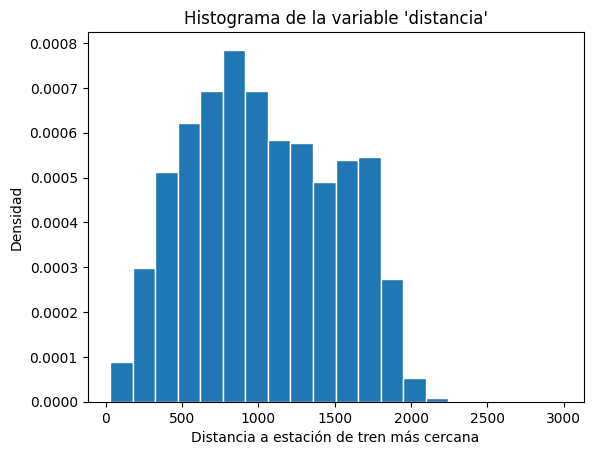

In [ ]:
plt.hist(datos['distancia'], bins=20, edgecolor="white", density=True)
plt.xlabel('Distancia a estación de tren más cercana')
plt.ylabel('Densidad')
plt.title("Histograma de la variable 'distancia'")
plt.show()

Basándonos en el gráfico, definimos un vector de posibles medias poblacionales que va desde un valor de 500 a 1500 con saltos de 0.1. Calculamos la suma de los residuos al cuadrado para cada uno de estos casos posibles y lo guardamos en una tabla de resultados:

In [ ]:
posibles_medias = np.arange(500, 1500, 0.1)

resultados = pd.DataFrame(columns=['sum_u2','media'])
for i in range(len(posibles_medias)):
  sum_u2 = sum((datos['distancia']-posibles_medias[i])**2)
  nueva_fila = {'sum_u2':sum_u2, 'media':posibles_medias[i]}
  resultados.loc[len(resultados)] = nueva_fila

De la tabla anterior, filtramos el caso que minimiza la suma de residuos al cuadrado:

In [ ]:
resultados[resultados['sum_u2']==min(resultados['sum_u2'])]

,sum_u2,media
5332,1.207407e+09,1033.2


Tenemos que la estimación por MCO para la media es igual a $\hat{\mu}= 1033.2$.

Chequeamos que este resultado es igual a la media muestral de la variable.

In [ ]:
datos['distancia'].mean()

1033.2067528033988

Vemos gráficamente cómo opera esta minimización:

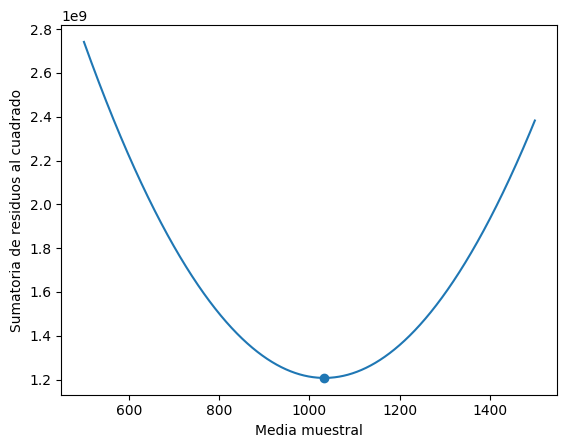

In [ ]:
plt.plot(resultados['media'], resultados['sum_u2'])
plt.scatter(resultados[resultados['sum_u2']==min(resultados['sum_u2'])]['media'],
            resultados[resultados['sum_u2']==min(resultados['sum_u2'])]['sum_u2'])
plt.ylabel('Sumatoria de residuos al cuadrado')
plt.xlabel('Media muestral')
# plt.ticklabel_format(style='plain')
plt.show()

**Variable 'precio'**

In [ ]:
datos['tipo'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

Vemos el rango de valores que puede asumir precio:

In [ ]:
print('Mínimo de precio =',datos['precio'].min())
print('Máximo de precio =',datos['precio'].max())

Mínimo de precio = 10
Máximo de precio = 4000


Teniendo en cuenta que es una variable que tiende a ser muy asimétrica, usamos el siguiente rango de valores para las 3 categorías:

In [ ]:
posibles_medias = np.arange(20, 1000, 1)
categorias_aloj = datos['tipo'].unique()

mco_resultados = pd.DataFrame(columns=['tipo','sum_u2','media'])

for i in range(len(posibles_medias)):
  for j in range(len(categorias_aloj)):
    sum_u2 = sum((datos[datos['tipo']==categorias_aloj[j]]['precio']-posibles_medias[i])**2)
    nueva_fila = {'tipo':categorias_aloj[j],'sum_u2':sum_u2, 'media':posibles_medias[i]}
    mco_resultados.loc[len(mco_resultados)] = nueva_fila

In [ ]:
mco_resultados.head()

,tipo,sum_u2,media
0,Entire home/apt,39293548,20
1,Private room,20636657,20
2,Shared room,110849,20
3,Entire home/apt,38831292,21
4,Private room,20561752,21


Filtramos la tabla para los valores mínimos de 'sum_u2' por grupo:

In [ ]:
index_min = mco_resultados.groupby('tipo')['sum_u2'].idxmin()
mco_resultados.loc[index_min]

,tipo,sum_u2,media
189,Entire home/apt,24654868,83
76,Private room,19698232,45
23,Shared room,104822,27


Corroboramos que coinciden con las medias muestrales:

In [ ]:
datos.groupby('tipo')['precio'].mean()

tipo
Entire home/apt    82.832255
Private room       44.554271
Shared room        26.786260
Name: precio, dtype: float64

## Estimación por MV

**Variable: Alojamiento completo (Bernoulli)**

Veamos un ejemplo de cálculo de la proporción muestral con el método de estimación de máxima verosimilitud. Para ello usaremos la variable de tipo de alojamiento, vemos la frecuencia de casos en cada categoría:

In [ ]:
datos['tipo'].value_counts()

tipo
Entire home/apt    3708
Private room       1557
Shared room         131
Name: count, dtype: int64

Creamos una variable binaria (bernoulli) que asume valor 1 cuando el alojamiento es una casa o departamento completo y asume valor 0 en caso contrario, cuando es una habitación privada o compartida.

In [ ]:
datos['aloj_completo'] = datos['tipo'].apply(
    lambda x: 1 if x=='Entire home/apt' else 0
    )
datos['aloj_completo'].value_counts()

aloj_completo
1    3708
0    1688
Name: count, dtype: int64

Graficamos su histograma. Dado que son mayoría los casos de alojamiento completo podemos esperar una proporción promedio mayor a 0.5

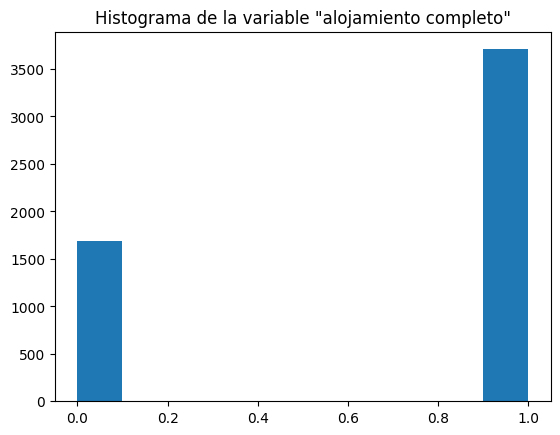

In [ ]:
plt.hist(datos['aloj_completo'])
plt.title('Histograma de la variable "alojamiento completo"')
plt.show()

Para la estimación, creamos un array de valores posibles de la proporción que va de 0 a 1 con saltos de 0.01:

In [ ]:
posibles_p = np.arange(0,1,0.01)

Generamos un DataFrame vacío donde guardar los resultados del siguiente bucle. Calculamos la log-verosimilitud para cada uno de los posibles p que definimos y luego buscaremos el valor que maximiza la función:

In [ ]:
resultados_mv = pd.DataFrame(columns=['logvrs','p'])
for i in range(len(posibles_p)):
  logvrs = sum(stats.binom.logpmf(datos['aloj_completo'], n=1, p=posibles_p[i]))
  nueva_fila = {'logvrs':logvrs, 'p':posibles_p[i]}
  resultados_mv.loc[len(resultados_mv)] = nueva_fila

Nos queda la siguiente tabla:

In [ ]:
resultados_mv

,logvrs,p
0,-inf,0.00
1,-1.709294e+04,0.01
2,-1.453988e+04,0.02
3,-1.305373e+04,0.03
4,-1.200450e+04,0.04
...,...,...
95,-5.246992e+03,0.95
96,-5.584830e+03,0.96
97,-6.032012e+03,0.97
98,-6.678406e+03,0.98


Filtramos la fila donde se maximiza el valor de la log-verosimilitud:

In [ ]:
resultados_mv[resultados_mv['logvrs']==max(resultados_mv['logvrs'])]

,logvrs,p
69,-3352.861003,0.69


Corroboramos que nos queda el mismo resultados que calcular la media sobre la variable bernoulli de **alojamiento completo**:

In [ ]:
datos['aloj_completo'].mean()

0.687175685693106

Graficamos la función y vemos donde se maximiza:

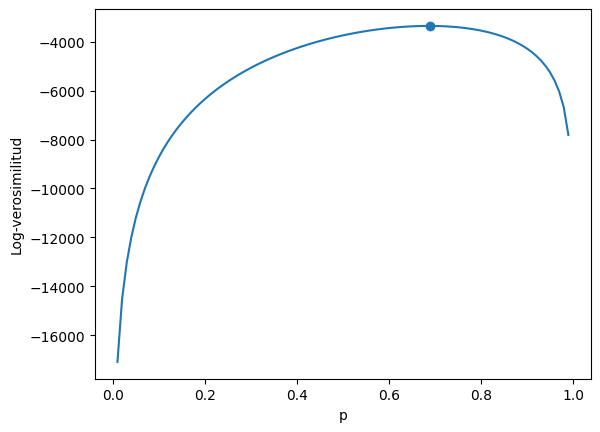

In [ ]:
plt.plot(resultados_mv['p'], resultados_mv['logvrs'])
plt.scatter(resultados_mv[resultados_mv['logvrs']==max(resultados_mv['logvrs'])]['p'],
            resultados_mv[resultados_mv['logvrs']==max(resultados_mv['logvrs'])]['logvrs'])
plt.ylabel('Log-verosimilitud')
plt.xlabel('p')
plt.show()

**Variable: distancia (Normal)**

Basado en el histograma que exploramos, podemos aproximar la distribución de esta variable a una distribución normal y estimar sus parámetros $\mu$ (esperanza poblacional) y $\sigma$ (desvío poblacional).

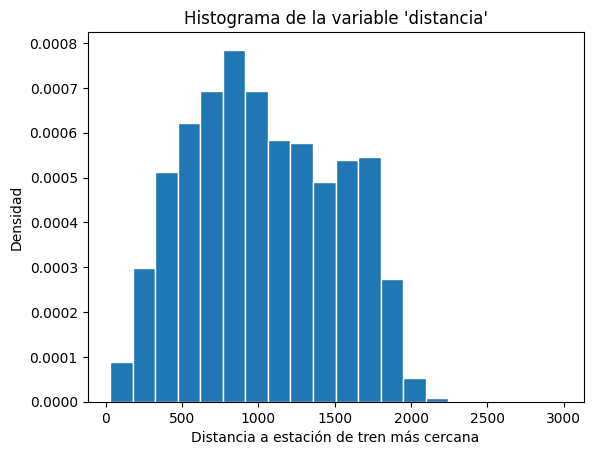

In [ ]:
plt.hist(datos['distancia'], bins=20, edgecolor="white", density=True)
plt.xlabel('Distancia a estación de tren más cercana')
plt.ylabel('Densidad')
plt.title("Histograma de la variable 'distancia'")
plt.show()

Definimos dos vectores con posibles valores de $\mu$ y $\sigma$:

In [ ]:
posibles_mu = np.arange(600, 1400, 1)
posibles_sigma = np.arange(300, 500, 1)

Corremos un bucle que por cada combinación de posibles $\mu$ y $\sigma$ calcule la logverosimilitud. Luego maximizaremos este valor.

In [ ]:
resultados_mv = pd.DataFrame(columns=['logvrs','mu','sigma'])

for i in range(len(posibles_mu)):
  for j in range(len(posibles_sigma)):
    logvrs = sum(stats.norm.logpdf(datos['distancia'], loc=posibles_mu[i], scale=posibles_sigma[j]))
    nueva_fila = {'logvrs':logvrs, 'mu':posibles_mu[i], 'sigma':posibles_sigma[j]}
    resultados_mv.loc[len(resultados_mv)] = nueva_fila

In [ ]:
# El bucle anterior demora bastante en correr, por eso guardamos el resultado en una tabla
# resultados_mv.to_csv('Bases/Resultados_mv_distancia.csv', index=False)

# Para cargar la tabla del archivo guardado
resultados_mv = pd.read_csv('Bases/Resultados_mv_distancia.csv')

Nos queda la siguiente tabla:

In [ ]:
resultados_mv

,logvrs,mu,sigma
0,-48069.890083,600,300
1,-48006.031558,600,301
2,-47942.924864,600,302
3,-47880.559699,600,303
4,-47818.925936,600,304
...,...,...,...
159995,-42375.569762,1399,495
159996,-42370.600039,1399,496
159997,-42365.704018,1399,497
159998,-42360.881022,1399,498


Filtramos la fila donde se maximiza la la log-verosimilitud:

In [ ]:
resultados_mv[resultados_mv['logvrs']==max(resultados_mv['logvrs'])]

,logvrs,mu,sigma
86773,-40891.440426,1033,473


Vemos que coincide con la media y el desvío estándar muestral:

In [ ]:
print('Media muestral =', datos['distancia'].mean())
print('Desvío estándar =',datos['distancia'].std())

Media muestral = 1033.2067528033988
Desvío estándar = 473.0761708545229


Para graficar la logverosimilitud, filtramos la tabla para que contenga menos filas y demore menos.

In [ ]:
resultados_mv_filt = resultados_mv[(resultados_mv['mu']>1000) & (resultados_mv['mu']<1050)]
resultados_mv_filt = resultados_mv_filt[(resultados_mv_filt['sigma']>450) & (resultados_mv_filt['sigma']<500)]
#x, y = np.meshgrid(resultados_mv_filt['mu'], resultados_mv_filt['sigma'])

In [ ]:
resultados_mv_filt

,logvrs,mu,sigma
80351,-40917.874192,1001,451
80352,-40916.646242,1001,452
80353,-40915.479064,1001,453
80354,-40914.372006,1001,454
80355,-40913.324426,1001,455
...,...,...,...
89995,-40904.976449,1049,495
89996,-40905.930559,1049,496
89997,-40906.922651,1049,497
89998,-40907.952332,1049,498


Graficamos la logverosimilitud dependiente de los valores $\mu$ y $\sigma$:

Text(0.5, 1.0, 'Logverosimilitud dela variable "distancia"')

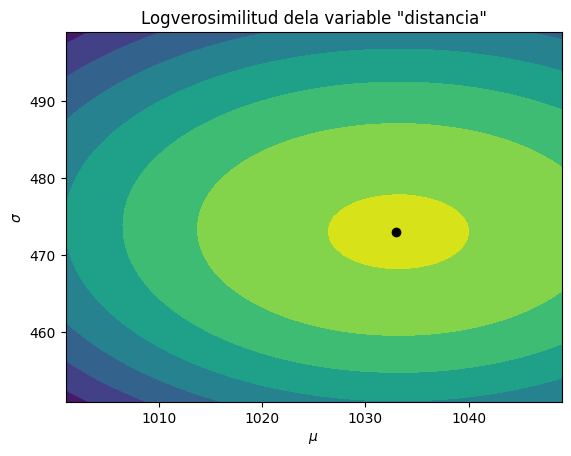

In [ ]:
plt.tricontourf(resultados_mv_filt['mu'], resultados_mv_filt['sigma'], resultados_mv_filt['logvrs'])
plt.scatter(resultados_mv_filt[resultados_mv_filt['logvrs']==max(resultados_mv_filt['logvrs'])]['mu'],
            resultados_mv_filt[resultados_mv_filt['logvrs']==max(resultados_mv_filt['logvrs'])]['sigma'],
            color="black")
plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
plt.title('Logverosimilitud dela variable "distancia"')

Guardamos las estimaciones realizadas y vemos gráficamente la función de densidad estimada:

In [ ]:
mu_estimado = resultados_mv[resultados_mv['logvrs']==max(resultados_mv['logvrs'])]['mu']
sigma_estimado = resultados_mv[resultados_mv['logvrs']==max(resultados_mv['logvrs'])]['sigma']

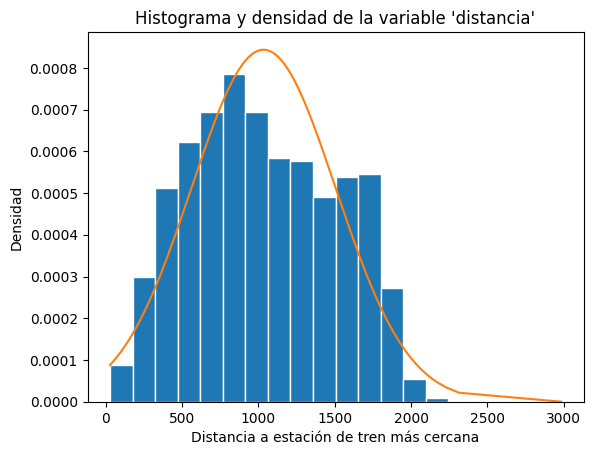

In [ ]:
plt.hist(datos['distancia'], bins=20, edgecolor="white", density=True)
plt.plot(datos['distancia'].sort_values(),
         stats.norm.pdf(datos['distancia'].sort_values(), loc=mu_estimado, scale=sigma_estimado))
plt.xlabel('Distancia a estación de tren más cercana')
plt.ylabel('Densidad')
plt.title("Histograma y densidad de la variable 'distancia'")
plt.show()

# Insesgamiento

El estimador de la media muestral es insesgado porque su distribución muestral está centrada en el verdadero valor del parámetro. Es decir, si calculamos la media muestral en repetidas muestras, estos valores estarán centrados en el verdadero parámetro.

$$E(\hat{\mu}_y)=\mu_y$$

Ilustramos esta propiedad con el siguiente bucle (para muestrear repetidas veces):

In [ ]:
# Fijamos semilla de simulación
np.random.seed(123)

# Corremos un bucle para guardar las medias muestrales
x_medias = []
for i in range(1,300):
  x = np.random.normal(loc=5, scale=1, size=50)
  x_medias.append(x.mean())

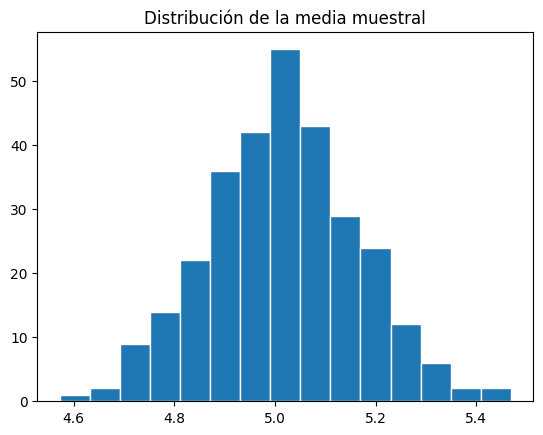

In [ ]:
plt.hist(x_medias, edgecolor="white", bins=15)
plt.title("Distribución de la media muestral")
plt.show()

Vemos que la distribución está centrada en $\mu=5$ (verdadero parámetro).

In [ ]:
x_medias = np.array(x_medias)
x_medias.mean()

5.015396070321507